In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
file_path = "GlobalWeatherRepository.csv"
df = pd.read_csv(file_path)
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,16-05-2024 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,4:50 AM,6:50 PM,12:12 PM,1:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,16-05-2024 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,5:21 AM,7:54 PM,12:58 PM,2:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,16-05-2024 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,5:40 AM,7:50 PM,1:15 PM,2:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,16-05-2024 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,6:31 AM,9:11 PM,2:12 PM,3:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,16-05-2024 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,6:12 AM,5:55 PM,1:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
df.isna().sum()
df.isnull()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29701,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29704,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:

df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

df.fillna(df.mode().iloc[0], inplace=True)

print("\nMissing values after handling:\n", df.isna().sum())


Missing values after handling:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozo

In [6]:
f = df[(np.abs(zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]

In [5]:
df_encoded = pd.get_dummies(df, columns=['country'], drop_first=True)
df_encoded.head()

,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,country_Гватемала,country_Польша,country_Турция,country_كولومبيا,country_火鸡
0,Kabul,34.52,69.18,Asia/Kabul,1715849100,16-05-2024 13:15,26.6,79.8,Partly Cloudy,8.3,...,False,False,False,False,False,False,False,False,False,False
1,Tirana,41.33,19.82,Europe/Tirane,1715849100,16-05-2024 10:45,19.0,66.2,Partly cloudy,6.9,...,False,False,False,False,False,False,False,False,False,False
2,Algiers,36.76,3.05,Africa/Algiers,1715849100,16-05-2024 09:45,23.0,73.4,Sunny,9.4,...,False,False,False,False,False,False,False,False,False,False
3,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,16-05-2024 10:45,6.3,43.3,Light drizzle,7.4,...,False,False,False,False,False,False,False,False,False,False
4,Luanda,-8.84,13.23,Africa/Luanda,1715849100,16-05-2024 09:45,26.0,78.8,Partly cloudy,8.1,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df_encoded.select_dtypes(include=['object']).columns

Index(['location_name', 'timezone', 'last_updated', 'condition_text',
       'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase'],
      dtype='object')

In [8]:
df_encoded = pd.get_dummies(df, columns=['country', 'location_name', 'condition_text', 'timezone',
                                         'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
                                         'moon_phase'], drop_first=True)


In [9]:
df_encoded.drop(columns=['last_updated'], inplace=True)


In [10]:
df_numeric = df_encoded.select_dtypes(include=['number'])

In [11]:
df_sample = df_numeric.sample(n=500, random_state=42) if len(df_numeric) > 500 else df_numeric


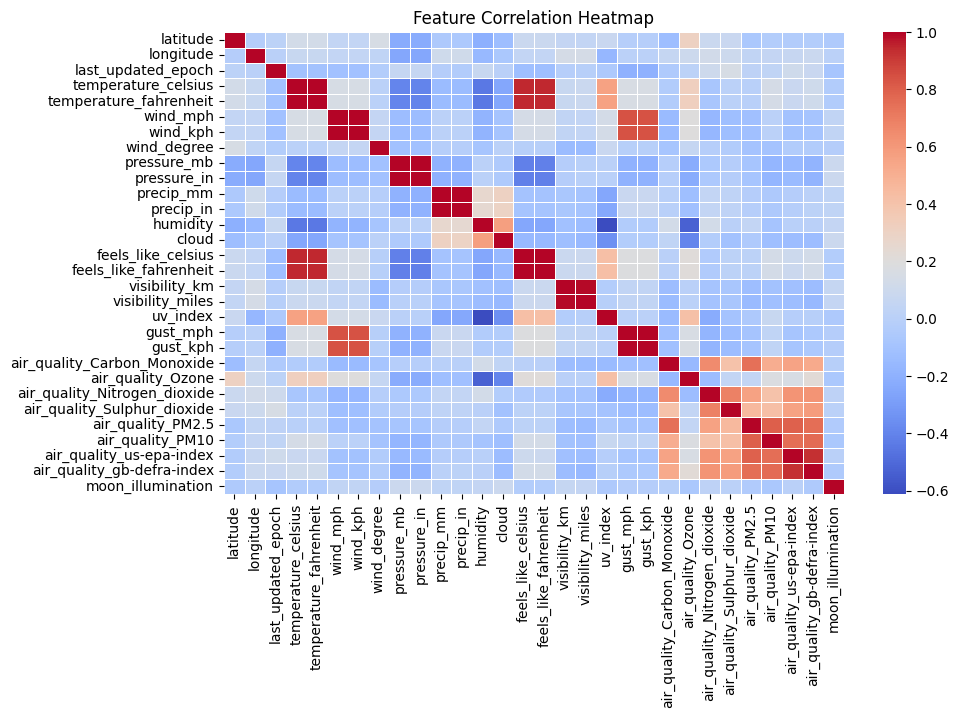

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sample.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



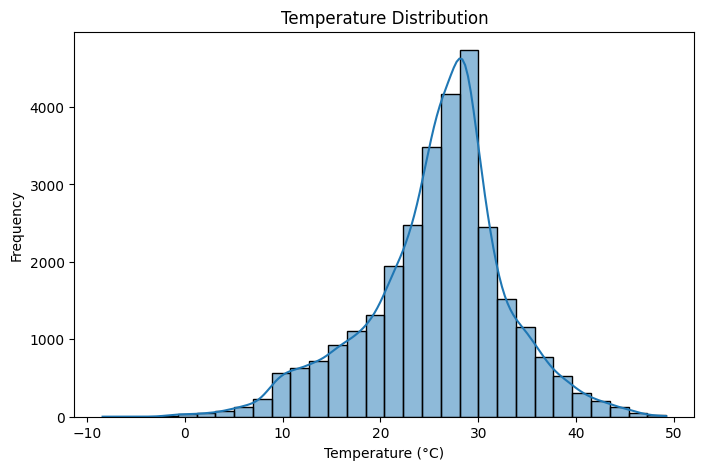

In [16]:

plt.figure(figsize=(8,5))
sns.histplot(df['temperature_celsius'], bins=30, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


In [15]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop(columns=['temperature_celsius'])
y = df_scaled['temperature_celsius']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['last_updated'] = pd.to_datetime(df['last_updated'])
df = df.sort_values(by='last_updated')
X = df[['last_updated_epoch']]
y = df['temperature_celsius']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Absolute Error: 5.390822708790456
Mean Squared Error: 50.68048597809941


<ipython-input-19-9dd235a5b2e5>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_updated'] = pd.to_datetime(df['last_updated'])


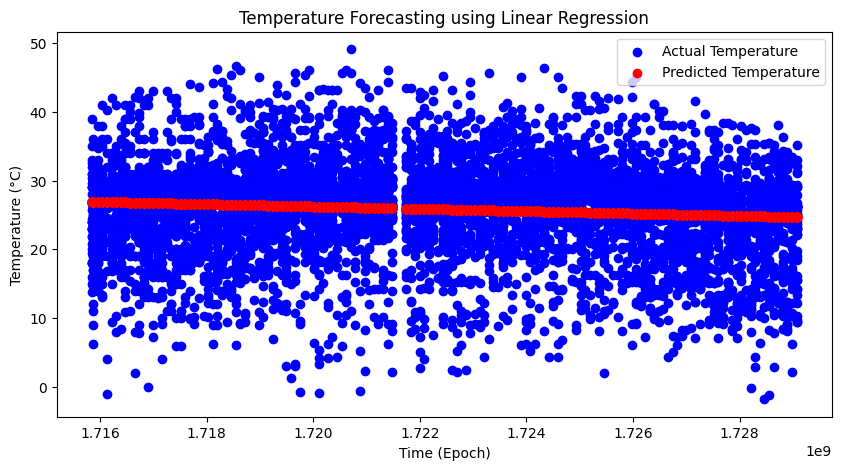

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label="Actual Temperature")
plt.scatter(X_test, y_pred, color='red', label="Predicted Temperature")
plt.xlabel("Time (Epoch)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Temperature Forecasting using Linear Regression")
plt.show()


In [22]:
df.to_csv("GlobalWeatherRepository_Cleaned.csv", index=False)